In [2]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [3]:
csv = pd.read_csv("dataset/Sensor_data_Normal.csv", parse_dates=True, index_col='Timestamp')

In [4]:
# Remove data collected on 22/12/2015
normal_csv = csv.drop(csv.head(28800).index, inplace=False)
normal_csv

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-23 00:00:00,0.000000,813.3956,1,2,1,262.3045,8.402845,440.0667,1.913562,2,...,2,1,254.0855,1.025214,193.2197,0.000000,1,1,1,Normal
2015-12-23 00:00:01,0.000000,813.0424,1,2,1,262.3045,8.402845,440.2974,2.148848,2,...,2,1,254.0214,1.025214,193.2197,0.000000,1,1,1,Normal
2015-12-23 00:00:02,0.000000,813.0424,1,2,1,262.3045,8.402845,440.8357,2.280844,2,...,2,1,253.8612,1.025214,193.2037,0.000000,1,1,1,Normal
2015-12-23 00:00:03,0.000000,813.0031,1,2,1,261.9841,8.400923,441.4509,2.368629,2,...,2,1,253.8612,1.025214,193.0595,0.000000,1,1,1,Normal
2015-12-23 00:00:04,0.000000,812.7283,1,2,1,261.9841,8.400923,442.3225,2.424375,2,...,2,1,254.0695,1.025214,193.0595,0.000000,1,1,1,Normal
2015-12-23 00:00:05,0.000000,812.5714,1,2,1,261.9841,8.400923,442.9890,2.452440,2,...,2,1,254.0695,1.025214,193.0595,0.000000,1,1,1,Normal
2015-12-23 00:00:06,0.000000,811.8256,1,2,1,261.9841,8.400923,443.8862,2.472175,2,...,2,1,254.0695,1.025214,193.2517,0.000000,1,1,1,Normal
2015-12-23 00:00:07,0.000000,811.8648,1,2,1,261.3432,8.403486,444.9628,2.482683,2,...,2,1,254.0695,1.025214,193.2517,0.000000,1,1,1,Normal
2015-12-23 00:00:08,0.000000,811.8256,1,2,1,261.3432,8.404448,446.4496,2.482683,2,...,2,1,254.0695,1.025214,193.2517,0.000000,1,1,1,Normal


In [5]:
del normal_csv['Normal/Attack']
normal_csv

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-23 00:00:00,0.000000,813.3956,1,2,1,262.3045,8.402845,440.0667,1.913562,2,...,0.308811,2,1,254.0855,1.025214,193.2197,0.000000,1,1,1
2015-12-23 00:00:01,0.000000,813.0424,1,2,1,262.3045,8.402845,440.2974,2.148848,2,...,0.310348,2,1,254.0214,1.025214,193.2197,0.000000,1,1,1
2015-12-23 00:00:02,0.000000,813.0424,1,2,1,262.3045,8.402845,440.8357,2.280844,2,...,0.310348,2,1,253.8612,1.025214,193.2037,0.000000,1,1,1
2015-12-23 00:00:03,0.000000,813.0031,1,2,1,261.9841,8.400923,441.4509,2.368629,2,...,0.310348,2,1,253.8612,1.025214,193.0595,0.000000,1,1,1
2015-12-23 00:00:04,0.000000,812.7283,1,2,1,261.9841,8.400923,442.3225,2.424375,2,...,0.310348,2,1,254.0695,1.025214,193.0595,0.000000,1,1,1
2015-12-23 00:00:05,0.000000,812.5714,1,2,1,261.9841,8.400923,442.9890,2.452440,2,...,0.310348,2,1,254.0695,1.025214,193.0595,0.000000,1,1,1
2015-12-23 00:00:06,0.000000,811.8256,1,2,1,261.9841,8.400923,443.8862,2.472175,2,...,0.310348,2,1,254.0695,1.025214,193.2517,0.000000,1,1,1
2015-12-23 00:00:07,0.000000,811.8648,1,2,1,261.3432,8.403486,444.9628,2.482683,2,...,0.310348,2,1,254.0695,1.025214,193.2517,0.000000,1,1,1
2015-12-23 00:00:08,0.000000,811.8256,1,2,1,261.3432,8.404448,446.4496,2.482683,2,...,0.310348,2,1,254.0695,1.025214,193.2517,0.000000,1,1,1


In [6]:
scaler = StandardScaler()
normalized_training = scaler.fit_transform(normal_csv)
print normalized_training
print normalized_training.shape

[[-1.60974171  1.92370667 -1.55066929 ...,  0.         -0.08835265  0.        ]
 [-1.60974171  1.92062061 -1.55066929 ...,  0.         -0.08835265  0.        ]
 [-1.60974171  1.92062061 -1.55066929 ...,  0.         -0.08835265  0.        ]
 ..., 
 [ 0.52582195 -0.61459511  0.61986329 ...,  0.         -0.08835265  0.        ]
 [ 0.52020312 -0.61425261  0.61986329 ...,  0.         -0.08835265  0.        ]
 [ 0.51907952 -0.61493849  0.61986329 ...,  0.         -0.08835265  0.        ]]
(468000L, 51L)


In [7]:
pca = decomposition.PCA(n_components=20)
pca.fit(normalized_training)
pca_model = pca.transform(normalized_training)

In [8]:
print np.sort(pca.explained_variance_)[::-1]
print np.sort(pca.explained_variance_ratio_)[::-1]

[ 9.49163999  7.44436409  4.40342458  2.84986671  2.54677445  1.99500883
  1.33156915  1.00027588  0.94145164  0.83120811  0.70015828  0.55628799
  0.45600218  0.38032773  0.3758103   0.28844213  0.27781014  0.19925567
  0.17555147  0.15042896]
[ 0.25653081  0.20119903  0.11901148  0.07702342  0.06883174  0.05391916
  0.03598836  0.02703448  0.02544464  0.02246508  0.0189232   0.01503481
  0.01232438  0.01027913  0.01015704  0.00779573  0.00750838  0.00538529
  0.00474463  0.00406565]


In [9]:
pca.explained_variance_ratio_.cumsum()

array([ 0.25653081,  0.45772984,  0.57674132,  0.65376474,  0.72259648,
        0.77651564,  0.812504  ,  0.83953848,  0.86498312,  0.8874482 ,
        0.9063714 ,  0.92140621,  0.93373059,  0.94400972,  0.95416675,
        0.96196249,  0.96947087,  0.97485616,  0.97960079,  0.98366644])

In [10]:
attack_csv = pd.read_csv("dataset/SWaT_Dataset_Attack.csv", parse_dates=True, dayfirst=True, index_col=' Timestamp')

In [11]:
labels =  attack_csv['Normal/Attack']

In [12]:
del attack_csv['Normal/Attack']

In [13]:
normalized_test = scaler.fit_transform(attack_csv)
pca_test = pca.transform(normalized_test)

In [14]:
pca_test.shape
print normalized_test.shape

(449919L, 51L)


In [15]:
attack_csv

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-28 10:00:00,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,0.307786,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1
2015-12-28 10:00:01,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,0.307786,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1
2015-12-28 10:00:02,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,2,...,0.308619,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1
2015-12-28 10:00:03,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,2,...,0.308619,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1
2015-12-28 10:00:04,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,2,...,0.308619,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1
2015-12-28 10:00:05,2.609294,523.8673,2,2,1,262.0161,8.394514,328.6337,2.444110,2,...,0.308619,2,1,250.7530,1.649953,189.5027,0.000128,1,1,1
2015-12-28 10:00:06,2.637158,524.1028,2,2,1,262.0161,8.394514,328.6337,2.444110,2,...,0.308619,2,1,250.5928,1.649953,189.5027,0.000128,1,1,1
2015-12-28 10:00:07,2.652211,524.2206,2,2,1,262.0161,8.394514,328.6337,2.441803,2,...,0.308619,2,1,250.5928,1.649953,189.5027,0.000128,1,1,1
2015-12-28 10:00:08,2.655735,524.4954,2,2,1,262.0161,8.394514,328.6337,2.441803,2,...,0.308619,2,1,250.9132,1.649953,189.5027,0.000128,1,1,1


In [19]:
eigenvectors = pca.components_

# Matrix P represents principal components corresponding to normal subspace
P = np.transpose(eigenvectors[:-9])
P_T = np.transpose(P)
C = np.dot(P, P_T)

# Identity Matrix with dimensions 51 X 51
I = np.identity(51)

# y_residual is the projection of test data on anomalous subspace
y_residual = np.zeros((normalized_test.shape))

# Calculate projection of test data on anomalous subspace
for i in range(normalized_test.shape[0]):
    # Convert row to column vector
    y = np.transpose(normalized_test[i])
    y_residual[i] = np.dot(I - C, y)  
    

In [53]:
#Calculate SPE for each y_residual
spe = np.zeros((normalized_test.shape[0]))

# na will be set to 1 if the spe is greater than the threshold 
na = np.zeros((normalized_test.shape[0]))
threshold = 1000
for i in range(normalized_test.shape[0]):
    spe[i] = np.square(np.sum(np.subtract(y_residual[i], normalized_test[i])))     
    
    # if spe is greater than threshold then classify as attack by setting na to 1
    if(spe[i] > threshold):
        na[i] = 1

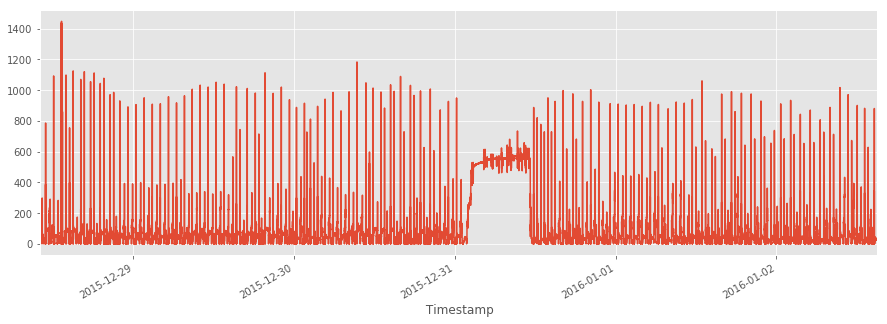

In [39]:
attack_csv = attack_csv.assign(ResidualVector=spe)
attack_csv['ResidualVector'].plot(figsize=(15,5))

In [52]:
tp = 0
fp = 0
tn = 0
fn = 0
for i in range(normalized_test.shape[0]):
    if(labels[i] == 'Attack' and na[i] == 1):
        tp = tp + 1
    if(labels[i] == 'Normal' and na[i] == 1):
        fp = fp + 1
    if(labels[i] == 'Normal' and na[i] == 0):
        fn = fn + 1    
    if(labels[i] == 'Attack' and na[i] == 0):
        tn = tn + 1
print tp
print fp
print fn
print tn

114
468
395551
53749
